In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SMSSpamCollection.csv', sep='\t',names=['Label','Text'])
data

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
sentence = "Hello friends! How are you?"

In [7]:
sentence

'Hello friends! How are you?'

In [8]:
from nltk import word_tokenize
from nltk.corpus import stopwords

In [9]:
print(word_tokenize(sentence))

['Hello', 'friends', '!', 'How', 'are', 'you', '?']


In [10]:
from nltk.corpus import stopwords

In [11]:
swords = stopwords.words('english')

In [12]:
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
clean = [word for word in word_tokenize(sentence) if word not in swords]

In [14]:
clean

['Hello', 'friends', '!', 'How', '?']

In [15]:
from nltk.stem import PorterStemmer
ps =PorterStemmer()
clean = [ps.stem(word) for word in clean]
clean

['hello', 'friend', '!', 'how', '?']

In [16]:
def cleanText(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in swords ]
    return clean


In [17]:
sent = cleanText('Hello friends! How are you? We\'ll be learning python today' )

In [18]:
print(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']


In [19]:
# TF-IDF - Term frequency Inverse Document Frequency
# TF(t) = no. of times term t appears in a document / total no. of terms in the document 
#  Eg term = 'hello' -> term
# document -> row for the term hello 

# IDF(t) = loge total no. of documents / no. of documents with term t in it
# To use TF-IDF method we can convert our data into number format
# W(x,y) = (tf(x,y) * log n ) / df(x) where tf(x,y) = frequency of x in y 
#              df(x) = no. of documents containing x , n = total no. of documents 



In [20]:
#Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer


In [21]:
tfidf = TfidfVectorizer(analyzer=cleanText);

In [22]:
y = data.Label
x = data.Text

In [23]:
x_new = tfidf.fit_transform(x)

In [24]:
print(x.shape)
print(x_new.shape) # where 6513 are unique words exists which have been converted into the column

(5572,)
(5572, 6513)


In [25]:
print(x_new)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52578 stored elements and shape (5572, 6513)>
  Coords	Values
  (0, 2602)	0.13538587933397997
  (0, 3234)	0.33773998989051757
  (0, 4416)	0.23061600566766993
  (0, 1642)	0.26155637320808295
  (0, 875)	0.2546627830679494
  (0, 1226)	0.28532410826254967
  (0, 3886)	0.18138906844909788
  (0, 2670)	0.18691623884268135
  (0, 6366)	0.22641055703609397
  (0, 3336)	0.28532410826254967
  (0, 2023)	0.20121094441090445
  (0, 1224)	0.3224093272932175
  (0, 1449)	0.28532410826254967
  (0, 2638)	0.15656739531298178
  (0, 691)	0.33773998989051757
  (0, 6193)	0.18656775650261379
  (1, 4107)	0.2791181079705321
  (1, 3364)	0.4119413485532704
  (1, 3204)	0.46727681005422184
  (1, 6291)	0.4354514107002345
  (1, 5957)	0.20079570761085996
  (1, 4132)	0.5514643620986254
  (2, 2447)	0.11980757112588468
  (2, 2127)	0.3727440092410635
  (2, 292)	0.10372163016435682
  :	:
  (5568, 2436)	0.46042030134261525
  (5568, 2156)	0.52827241078615
  (5569, 5246

In [26]:
y.value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [27]:
#cross validation testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_new,y,random_state=0,test_size=0.25)

In [28]:
X_train.shape

(4179, 6513)

In [29]:
X_test.shape

(1393, 6513)

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb = GaussianNB()
nb.fit(X_train.toarray(),y_train)

GaussianNB()

In [32]:
y_pred = nb.predict(X_test.toarray())

In [33]:
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [34]:
y_test.value_counts()

Label
ham     1208
spam     185
Name: count, dtype: int64

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

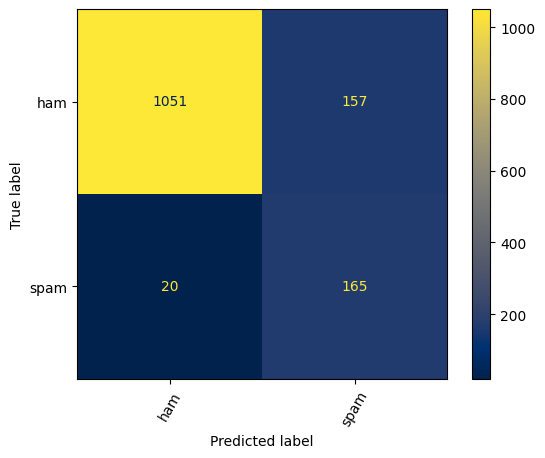

In [36]:
con = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='cividis',xticks_rotation=60);

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
mat

array([[1051,  157],
       [  20,  165]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [39]:
from sklearn.ensemble import RandomForestClassifier #ensemble algo

In [40]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [41]:
y_pred2 = rf.predict(X_test)

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

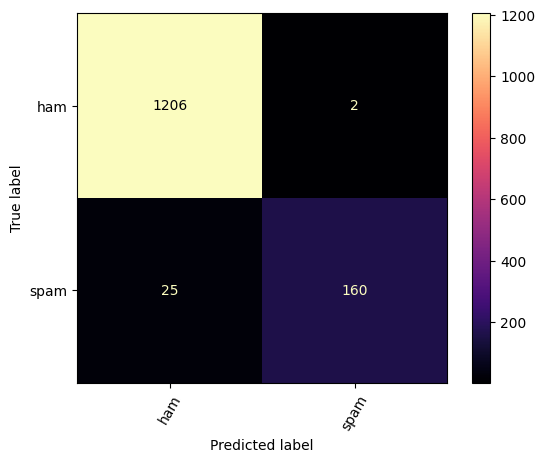

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2,cmap='magma',xticks_rotation=60);

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
accuracy_score(y_test,y_pred)

0.9641062455132807

In [46]:

from sklearn.model_selection import GridSearchCV

params = {
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2'],
    'random_state':[0,1,2,3,4],
    'class_weight':['balanced','balanced_subsample']
}

In [47]:
grid = GridSearchCV(rf,param_grid=params,cv=5,scoring='accuracy',verbose=3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_features=sqrt, random_state=0;, score=0.976 total time=   5.2s
[CV 2/5] END class_weight=balanced, criterion=gini, max_features=sqrt, random_state=0;, score=0.965 total time=   5.6s
[CV 3/5] END class_weight=balanced, criterion=gini, max_features=sqrt, random_state=0;, score=0.980 total time=   4.9s
[CV 4/5] END class_weight=balanced, criterion=gini, max_features=sqrt, random_state=0;, score=0.964 total time=   4.2s
[CV 5/5] END class_weight=balanced, criterion=gini, max_features=sqrt, random_state=0;, score=0.970 total time=   5.4s
[CV 1/5] END class_weight=balanced, criterion=gini, max_features=sqrt, random_state=1;, score=0.981 total time=   5.4s
[CV 2/5] END class_weight=balanced, criterion=gini, max_features=sqrt, random_state=1;, score=0.963 total time=   5.2s
[CV 3/5] END class_weight=balanced, criterion=gini, max_features=sqrt, random_state=1;, score=0.977 total

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy', verbose=3)

In [48]:
rf = grid.best_estimator_
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9777458722182341